# Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve

## What is ROC curve?
The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

## Generate synthetic dataset

In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [3]:
X, Y = make_classification(n_samples = 2000, n_classes = 2, n_features = 10 , random_state = 0 )

## Add noisy features to make the problem more difficult

In [4]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X =np.c_[X,random_state.randn(n_samples, 200 * n_features)]

## Data splitting

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.2,random_state = 0)

## Build classification model

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
rf = RandomForestClassifier(max_features = 5, n_estimators = 50)

In [10]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=50)

### Naive Bayes

In [12]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [14]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [15]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

### Computing AUROC and ROC curve values

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUROC
ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [18]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

### Print AUROC scores

In [19]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.684
Naive Bayes: AUROC = 0.993


### Calculate ROC curve

In [20]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

### Plot the ROC curve

In [21]:
import matplotlib.pyplot as plt

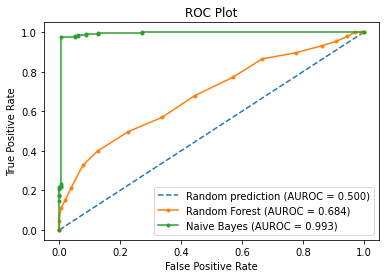

In [22]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()